# **Premiums**
net premium
\begin{equation}
P = \frac{1}{n}\mathbb{E}[S]
\end{equation}

In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

## Net premium

In [9]:
n = 350
u = 6.5
s = 1.5

m = 1000
S = np.zeros( m )

for i in range( 0, m ): 
    S[i] = np.sum( np.random.lognormal( mean = u, sigma = s, size = n ) )

ES = np.mean( S )
print( 'Mean total claim E[S]: ', ES )

P = ES / n
print( 'Net premium P: ', P )

Mean total claim E[S]:  714411.0128619471


In [10]:
R = n * P - S
PR = np.mean( R < 0 )
print( PR )

0.438


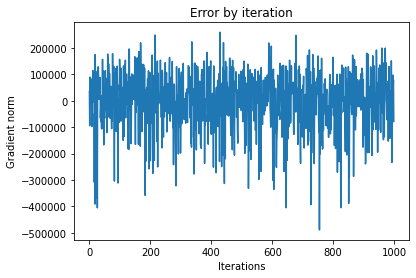

In [11]:
plt.xlabel( 'Iterations' )
plt.ylabel( 'Gradient norm' )
plt.title( 'Error by iteration' )
# plt.yscale( 'log' )
plt.plot( R )

## Risk premium
\begin{equation}
\mathbb{P}( nP - S > 0 ) = 1 - \alpha
\end{equation}

In [15]:
alpha = 100 * 0.95
Sq = np.percentile( S, alpha )
print( 'Percentil alpha of total claim Sq: ', Sq )

Pq = Sq / n
print( 'Risk premium Pq: ', Pq )

Rq = n * Pq - S
PRq = np.mean( Rq < 0 )
print( PRq )

Percentil alpha of total claim Sq:  919234.1156747595
Risk premium Pq:  2626.38318764217
0.05


NameError: name 'Rq' is not defined

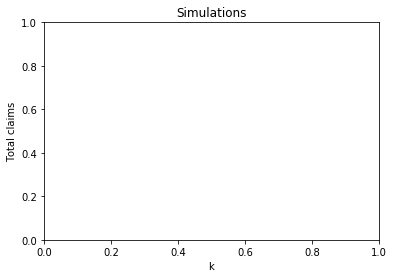

In [2]:
plt.xlabel( 'k' )
plt.ylabel( 'Total claims' )
plt.title( 'Simulations' )
plt.plot( Rq )

---
## **Poisson process**

In [3]:
lamb = 10
m = 1000
Tmax = 1

T = []
N = []
for i in range( 0, m ): 
  Ti = [0]
  Ni = [0]
  W = 0
  chk = True
  while chk :
    Tn = np.random.exponential( scale = 1/lamb, size = 1 )
    if W + Tn < Tmax :
      Ti = np.append( Ti, Tn )
      Nn = np.random.poisson( lam = lamb * Tn, size = 1 )
      Ni = np.append( Ni, Nn )
      W = W + Tn
    else : 
      chk = False
    
  T.append( Ti )
  N.append( Ni )


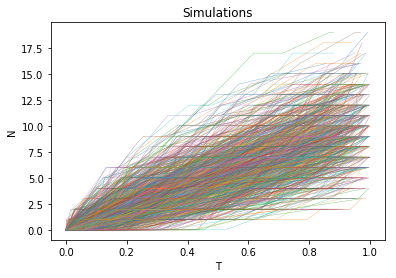

In [4]:
plt.xlabel( 'T' )
plt.ylabel( 'N' )
plt.title( 'Simulations' )
for i in range( 0, len( T ) ) :
  plt.plot( np.cumsum( T[i] ), np.cumsum( N[i] ), linewidth = 0.25 )
